In [1]:
using ReinforcementLearning, ReinforcementLearningEnvironments

┌ Info: Precompiling ReinforcementLearning [158674fc-8238-5cab-b5ba-03dfc80d1318]
└ @ Base loading.jl:1264
┌ Warning: /mnt/E4E0A9C0E0A998F6/github/ReinforcementLearning.jl/src/components/agents/q_agents is not an existing directory, Revise is not watching
└ @ Revise /home/tj/.julia/packages/Revise/D6h31/src/Revise.jl:419
┌ Warning: /mnt/E4E0A9C0E0A998F6/github/ReinforcementLearning.jl/src/patches is not an existing directory, Revise is not watching
└ @ Revise /home/tj/.julia/packages/Revise/D6h31/src/Revise.jl:419


In [2]:
using RLIntro
using RLIntro.BlackJack

In [3]:
env = BlackJackEnv(;is_exploring_start=true)

ns, na = length(observation_space(env)), length(action_space(env))

(220, 2)

In [ ]:
agent = Agent(
    ExploringStartPolicy(
        π = QBasedPolicy(
            MonteCarloLearner(TabularQApproximator(;n_state=ns, n_action=na);kind=EVERY_VISIT),
            EpsilonGreedySelector(0.)
        ),
        actions=1:na
    ),
    episode_RTSA_buffer()
);

run(agent, env, StopAfterEpisode(500000))

In [14]:
using Plots

In [29]:
q_value = reshape(agent.π.π.learner.approximator.table, 2, 11, 10, 2)
p1 = map(x -> x.I[3], argmax(q_value[1, :, :, :], dims=3))
p2 = map(x -> x.I[3], argmax(q_value[2, :, :, :], dims=3));

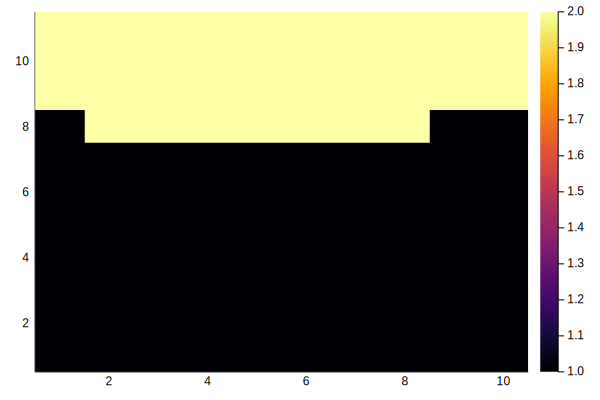

In [30]:
heatmap(dropdims(p1, dims=3))

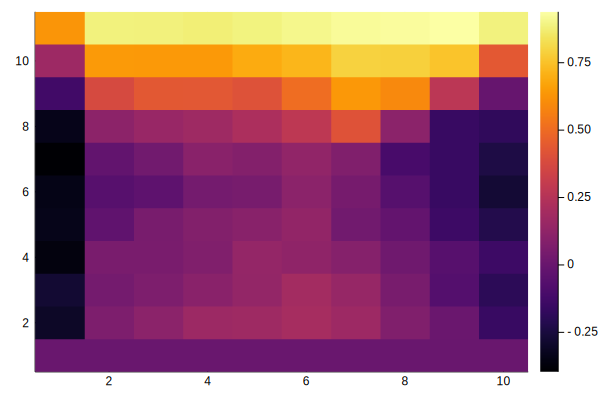

In [36]:
heatmap(dropdims(maximum(q_value[1, :, :, :]; dims=3), dims=3))

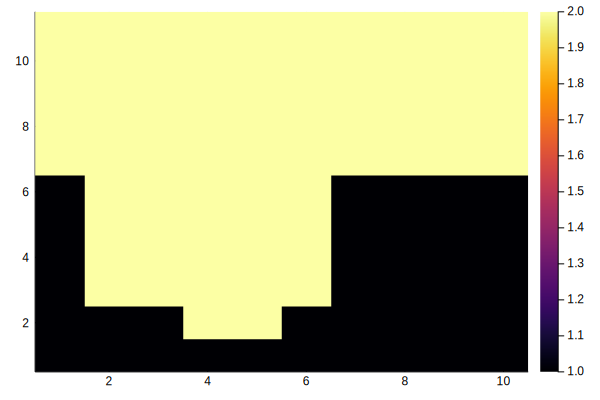

In [31]:
heatmap(dropdims(p2, dims=3))

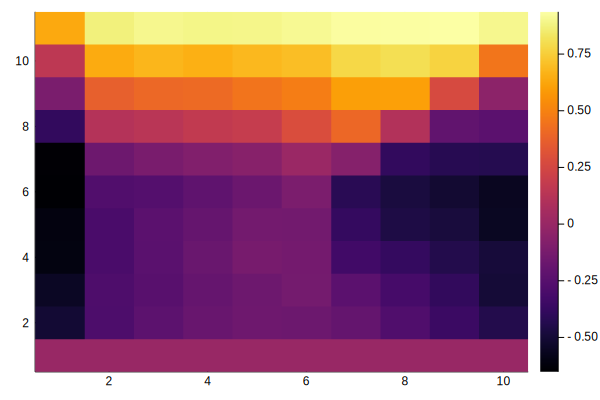

In [37]:
heatmap(dropdims(maximum(q_value[2, :, :, :]; dims=3), dims=3))